In [11]:
import pandas as pd

out_path = 'output/results/'

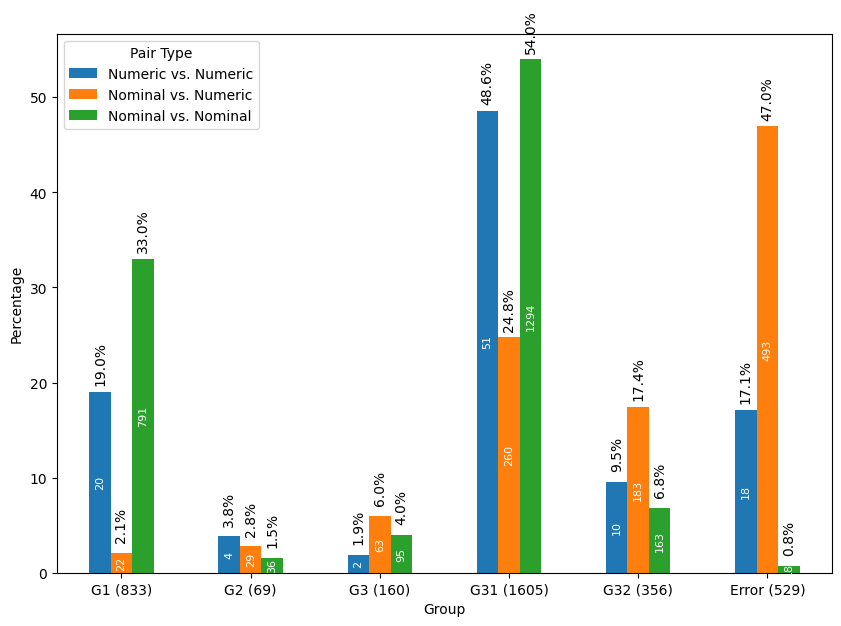

In [12]:
pair_type_abs = {
    'Numeric vs. Numeric': [20, 4, 2, 51, 10, 18],
    'Nominal vs. Numeric': [22, 29, 63, 260, 183, 493],
    'Nominal vs. Nominal': [791, 36, 95, 1294, 163, 18]
}

groups = [
    f'G1 ({sum([i[0] for i in pair_type_abs.values()])})',
    f'G2 ({sum([i[1] for i in pair_type_abs.values()])})',
    f'G3 ({sum([i[2] for i in pair_type_abs.values()])})',
    f'G31 ({sum([i[3] for i in pair_type_abs.values()])})',
    f'G32 ({sum([i[4] for i in pair_type_abs.values()])})',
    f'Error ({sum([i[5] for i in pair_type_abs.values()])})'
]

pair_type_abs_df = pd.DataFrame(pair_type_abs, index=groups).T
pair_type_abs_df

import matplotlib.pyplot as plt

# Transpose the dataframe to group by G1 to G3
pair_type_percent_df_T = (pair_type_abs_df.div(pair_type_abs_df.sum(axis=1), axis=0) * 100).T

# Plot the transposed normalized data
ax = pair_type_percent_df_T.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.legend(title='Pair Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add absolute numbers as labels to the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 1.5),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=90)
    abs_value = pair_type_abs_df.T.iloc[i % len(pair_type_abs_df.T), i // len(pair_type_abs_df.T)]
    ax.annotate(f'{abs_value}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=8, rotation=90)

plt.savefig(out_path + 'group_distribution_grouped.pdf', bbox_inches='tight')
plt.show()


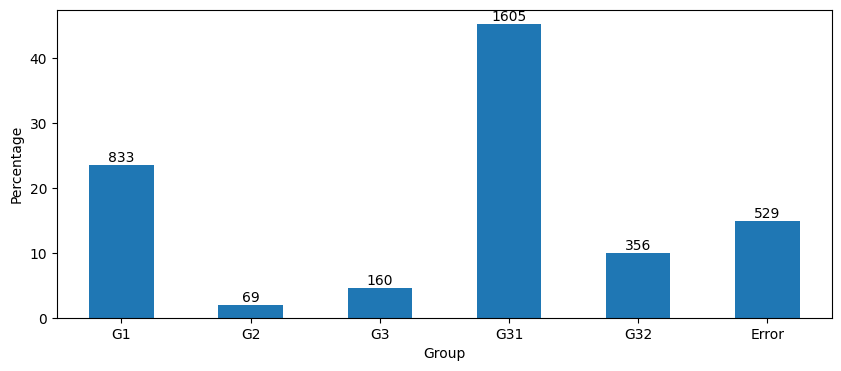

In [13]:
groups = [
    f'G1',
    f'G2',
    f'G3',
    f'G31',
    f'G32',
    f'Error'
]

pair_type_abs_df = pd.DataFrame(pair_type_abs, index=groups).T
pair_type_abs_df
merged_pair_type_abs = pair_type_abs_df.sum(axis=0).to_frame().T

# Transpose the dataframe to group by G1 to G3
merged_pair_type_percent_df_T = (merged_pair_type_abs.div(merged_pair_type_abs.sum(axis=1), axis=0) * 100).T

# Plot the transposed normalized data
ax = merged_pair_type_percent_df_T.plot(kind='bar', figsize=(10, 4))
plt.xlabel('Group')
plt.ylabel('Percentage')
# plt.legend(title='Merged Pair Type')
ax.legend().set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add absolute numbers as labels to the bars
for i, p in enumerate(ax.patches):
    abs_value = merged_pair_type_abs.T.iloc[i % len(merged_pair_type_abs.T), i // len(merged_pair_type_abs.T)]
    ax.annotate(abs_value, (p.get_x() + p.get_width() / 2., p.get_height() - 1),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig(out_path + 'group_distribution.pdf', bbox_inches='tight')
plt.show()